In [2]:
import os
import re
import seaborn as sb
import cPickle


In [1]:
import TuningTools

/cvmfs/atlas.cern.ch/repo/ATLASLocalRootBase/x86_64/root/6.04.16-x86_64-slc6-gcc49-opt/lib/ROOT.py:301: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return _orig_ihook( name, *args, **kwds )
Using TensorFlow backend.


PreProc 2.1.2


In [190]:
reload(plt)

<module 'matplotlib.pyplot' from '/usr/lib64/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [3]:
#import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics

In [4]:
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

In [80]:
dirout = '/home/caducovas/DeepRinger/results/plots'

In [6]:
dirin = '/home/caducovas/DeepRinger/data/run_layer1/'
data10 = np.load(dirin+"val_Data_sort_6_hidden_neurons_10.npy")
data20 = np.load(dirin+"val_Data_sort_6_hidden_neurons_20.npy")
data30 = np.load(dirin+"val_Data_sort_3_hidden_neurons_30.npy")
data40 = np.load(dirin+"val_Data_sort_9_hidden_neurons_40.npy")
data50 = np.load(dirin+"val_Data_sort_9_hidden_neurons_50.npy")
data60 = np.load(dirin+"val_Data_sort_9_hidden_neurons_60.npy")
data70 = np.load(dirin+"val_Data_sort_9_hidden_neurons_70.npy")
data80 = np.load(dirin+"val_Data_sort_9_hidden_neurons_80.npy")
data85 = np.load(dirin+"val_Data_sort_9_hidden_neurons_85.npy")
data90 = np.load(dirin+"val_Data_sort_9_hidden_neurons_90.npy")
data95 = np.load(dirin+"val_Data_sort_9_hidden_neurons_95.npy")
data100 = np.load(dirin+"val_Data_sort_9_hidden_neurons_100.npy")



In [7]:
dirin = '/home/caducovas/DeepRinger/data/'
data77 = np.load(dirin+"val_Data_sort_6_hidden_neurons_77.npy")
data87 = np.load(dirin+"val_Data_sort_6_hidden_neurons_87.npy")

In [36]:
print np.array_equal(data0,val_Data) #,np.array_equal(data40,data10) #,np.array_equal(data10,data40),np.array_equal(data10,data50),np.array_equal(data10,data60),np.array_equal(data10,data70),np.array_equal(data10,data80)

True


In [48]:
print np.array_equal(data10,data20),np.array_equal(data10,data30),np.array_equal(data10,data40),np.array_equal(data10,data50),np.array_equal(data10,data60),np.array_equal(data10,data70),np.array_equal(data10,data80)

True False True True True True True


In [39]:
print data10[1000][10]
print data20[1000][10]
print data30[1000][10]
print data40[1000][10]
print data50[1000][10]
print data60[1000][10]
print data70[1000][10]
print "80",data80[1000][10]
print data85[1000][10]
print data90[1000][10]
print data95[1000][10]
print data100[1000][10]

0.031096699
0.031096699
0.031096699
0.031096699
0.031096699
0.031096699
0.031096699
80 0.031096699
0.031096699
0.031096699
0.031096699
0.031096699


In [9]:
data0 = np.load(dirin+"val_Data_sort_0_hidden_neurons_77.npy")
data1 = np.load(dirin+"val_Data_sort_1_hidden_neurons_77.npy")
data2 = np.load(dirin+"val_Data_sort_2_hidden_neurons_77.npy")
data3 = np.load(dirin+"val_Data_sort_3_hidden_neurons_77.npy")
data4 = np.load(dirin+"val_Data_sort_4_hidden_neurons_77.npy")
data5 = np.load(dirin+"val_Data_sort_5_hidden_neurons_77.npy")
data6 = np.load(dirin+"val_Data_sort_6_hidden_neurons_77.npy")
data7 = np.load(dirin+"val_Data_sort_7_hidden_neurons_77.npy")
data8 = np.load(dirin+"val_Data_sort_8_hidden_neurons_77.npy")
data9 = np.load(dirin+"val_Data_sort_9_hidden_neurons_77.npy")


In [10]:
#import TuningTools

In [205]:
import pickle
f = open(dirin+"/tunedDiscr.pp-N1-AE_77.hn0010.s0003.il0000.iu0099.et0002.eta0000.pic",'r')
#f = open(dirin+"/run_layer1/tunedDiscr.pp-N1-AE_80.hn0010.s0005.il0000.iu0099.et0002.eta0000.pic",'r')

a = pickle.load(f)
f.close()
#g = open("/home/caducovas/DeepRinger/data/tunedDiscr.pp-N1-AE_82.hn0010.s0004.il0000.iu0099.et0002.eta0000.pic",'r')
#b = cPickle.load(g)
#g.close()

In [206]:
a['tunedPP']['items'][0]['items'][0].keys()#['__module']
#a['tunedPP']['items'][0]['items'][0].keys()#['__module']

['_normslist',
 '_afternorm',
 '_beforenorm',
 '__module',
 '__version',
 'class',
 '_cnvObj']

In [216]:
beforenorm = a['tunedPP']['items'][0]['items'][0]['_beforenorm'] #[0].shape
afternorm = a['tunedPP']['items'][0]['items'][0]['_afternorm'] #[0].shape
norms = a['tunedPP']['items'][0]['items'][0]['_normslist'] #[0].shape

In [222]:
if isinstance(beforenorm, (tuple, list,)):
      norm_data = []
      for i, cdata in enumerate(beforenorm):
        norm_data.append( cdata / norms[i])

In [237]:
if isinstance(afternorm, (tuple, list,)):
      unnorm_data = []
      for i, cdata in enumerate(afternorm):
        unnorm_data.append( cdata * norms[i])

In [243]:
unnorm_data[1][43]

array([ 4.14324524e+02,  5.80920563e+01,  2.90117615e+02, -3.82144836e+02,
       -3.07323822e+02,  1.47303711e+02, -1.26472496e+02,  1.27288582e+02,
        2.27023071e+03,  3.56478882e+03,  9.86738037e+02,  4.83409485e+02,
        1.14288086e+02,  6.55897369e+01,  7.04929428e+01, -2.07344189e+01,
        8.46368942e+01, -1.56415987e+01, -5.55555191e+01,  3.46798325e+01,
       -3.04336834e+01, -3.92068291e+00,  4.15888824e+01, -4.29359665e+01,
        9.31302261e+01,  1.36893091e+01,  2.44227619e+01, -5.81115150e+01,
       -7.88156052e+01,  5.04332542e+01,  1.59602060e+01, -9.38887882e+00,
       -3.06666241e+01, -6.20635185e+01,  1.91980529e+00, -5.17838554e+01,
        3.16268997e+01, -1.08848457e+01, -7.75930786e+01, -1.16034327e+01,
        9.62844193e-02, -2.99665508e+01, -2.22139091e+01, -4.39717979e+01,
       -3.39476180e+00, -1.71876450e+01,  1.32685280e+01, -2.33074245e+01,
       -5.61474711e-02, -5.79938278e+01, -4.29106407e+01, -2.08246975e+01,
       -5.40919638e+00, -

In [242]:
beforenorm[1][43]

array([ 4.14324524e+02,  5.80920563e+01,  2.90117615e+02, -3.82144836e+02,
       -3.07323822e+02,  1.47303711e+02, -1.26472496e+02,  1.27288582e+02,
        2.27023071e+03,  3.56478882e+03,  9.86738037e+02,  4.83409485e+02,
        1.14288086e+02,  6.55897369e+01,  7.04929428e+01, -2.07344189e+01,
        8.46368942e+01, -1.56415987e+01, -5.55555191e+01,  3.46798325e+01,
       -3.04336853e+01, -3.92068315e+00,  4.15888824e+01, -4.29359665e+01,
        9.31302261e+01,  1.36893091e+01,  2.44227619e+01, -5.81115150e+01,
       -7.88156052e+01,  5.04332542e+01,  1.59602060e+01, -9.38887882e+00,
       -3.06666241e+01, -6.20635185e+01,  1.91980529e+00, -5.17838516e+01,
        3.16268997e+01, -1.08848457e+01, -7.75930786e+01, -1.16034327e+01,
        9.62844193e-02, -2.99665527e+01, -2.22139091e+01, -4.39717979e+01,
       -3.39476156e+00, -1.71876450e+01,  1.32685280e+01, -2.33074245e+01,
       -5.61474748e-02, -5.79938278e+01, -4.29106407e+01, -2.08246975e+01,
       -5.40919638e+00, -

In [215]:
len(norms[0])+len(norms[1])

339519

In [208]:
if isinstance(data, (tuple, list,)):
    #norm1_val_Data = np.concatenate( data, axis=0 )
    norm1_val_Data = np.concatenate( data, axis=0 )

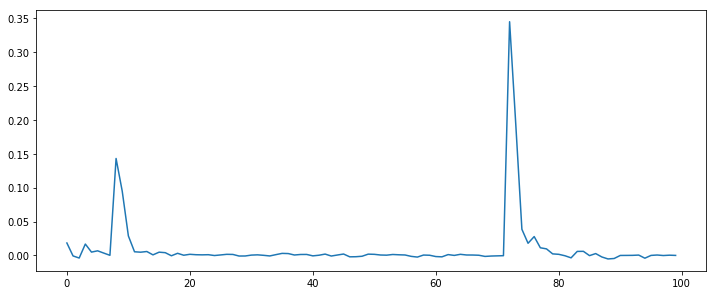

In [131]:
norm1_val_Data[1]
plt.plot(norm1_val_Data[1])

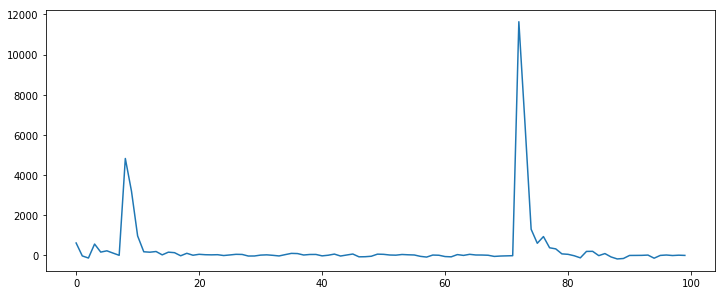

In [130]:
val_Data[1]
plt.plot(val_Data[1])
#before_val_Data87[-43]

In [113]:
for i in range(before_val_Data87.shape[1]):
    pdf, a = EstPDF(before_val_Data87.T[i],mode='hist')
    plt.plot(pdf)
    plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Energia do Anel',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.grid()
    plt.savefig(dirout+'pdf_norm1'+str(i+1)+'.png')
    plt.gcf().clear()
#plt.savefig(dirout+'60X40_kl_recons_anel.png')

In [99]:
data[0].T.shape
data[1].T.shape


(100, 2900)

In [145]:
for i in range(norm1_val_Data.shape[1]):
    pdf, a = EstPDF(norm1_val_Data.T[i],mode='hist')
    plt.plot(pdf)
    pdf, a = EstPDF(data[0].T[i],mode='hist')
    plt.plot(pdf)
    pdf, a = EstPDF(data[1].T[i],mode='hist')
    plt.plot(pdf)
    plt.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
    plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Energia do Anel',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.grid()
    plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
    plt.gcf().clear()


Anel: 1
OK Anel: 1
Anel: 2
OK Anel: 2
Anel: 3
OK Anel: 3
Anel: 4
OK Anel: 4
Anel: 5
OK Anel: 5
Anel: 6
OK Anel: 6
Anel: 7
OK Anel: 7
Anel: 8
OK Anel: 8
Anel: 9
OK Anel: 9
Anel: 10
OK Anel: 10
Anel: 11
OK Anel: 11
Anel: 12
OK Anel: 12
Anel: 13
OK Anel: 13
Anel: 14
OK Anel: 14
Anel: 15
OK Anel: 15
Anel: 16
OK Anel: 16
Anel: 17
OK Anel: 17
Anel: 18
OK Anel: 18
Anel: 19
OK Anel: 19
Anel: 20
OK Anel: 20
Anel: 21
OK Anel: 21
Anel: 22
OK Anel: 22
Anel: 23
OK Anel: 23
Anel: 24
OK Anel: 24
Anel: 25
OK Anel: 25
Anel: 26
OK Anel: 26
Anel: 27
OK Anel: 27
Anel: 28
OK Anel: 28
Anel: 29
OK Anel: 29
Anel: 30
OK Anel: 30
Anel: 31
OK Anel: 31
Anel: 32
OK Anel: 32
Anel: 33
OK Anel: 33
Anel: 34
OK Anel: 34
Anel: 35
OK Anel: 35
Anel: 36
OK Anel: 36
Anel: 37
OK Anel: 37
Anel: 38
OK Anel: 38
Anel: 39
OK Anel: 39
Anel: 40
OK Anel: 40
Anel: 41
OK Anel: 41
Anel: 42
OK Anel: 42
Anel: 43
OK Anel: 43
Anel: 44
OK Anel: 44
Anel: 45
OK Anel: 45
Anel: 46
OK Anel: 46
Anel: 47
OK Anel: 47
Anel: 48
OK Anel: 48
Anel: 49
O

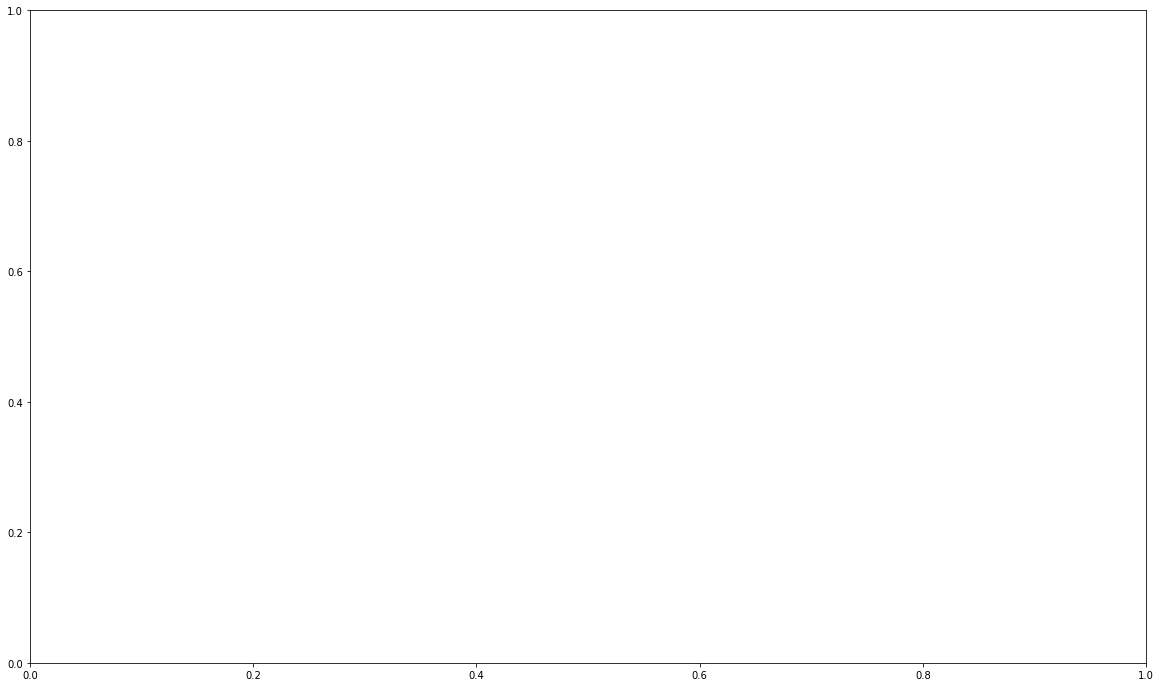

In [209]:
fig1 = plt.figure(figsize=(20, 12))
for i in range(norm1_val_Data.shape[1]):
    print 'Anel: '+str(i+1)
    try:
        print 'OK Anel: '+str(i+1)
        #fig1 = plt.figure(figsize=(20, 12))
        #i=0
        #pdf, a = EstPDF(norm1_val_Data.T[i],mode='hist')
        sb.kdeplot(norm1_val_Data.T[i],shade=True,label="All")
        #pdf, a = EstPDF(data[0].T[i],mode='hist')
        sb.kdeplot(data[0].T[i],label="Signal")
        #pdf, a = EstPDF(data[1].T[i],mode='hist')
        sb.kdeplot(data[1].T[i],label="Background")
        plt.legend(loc='best',fontsize = 'xx-large')
        plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
        plt.ylabel('Probabilidade',fontsize= 'xx-large')
        plt.xlabel('Energia do Anel',fontsize= 'xx-large')
        plt.tick_params(axis='both',labelsize=16)
        plt.grid()
        plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
        plt.gcf().clear()
    except:
        print 'Erro Anel: '+str(i+1)


In [203]:
val_Data.shape[1]
#import sklearn
#sklearn.neighbors.KernelDensity(norm1_val_Data.T[1])

100

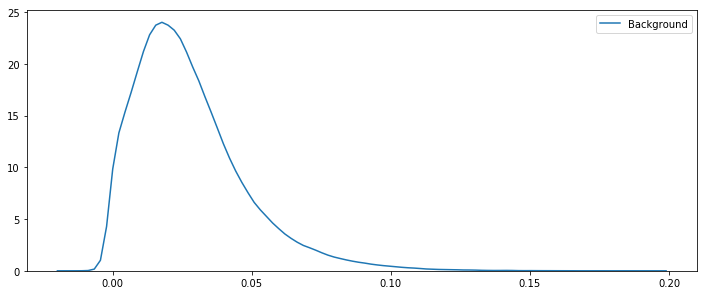

In [192]:
sb.kdeplot(data[0].T[0],label="Background")

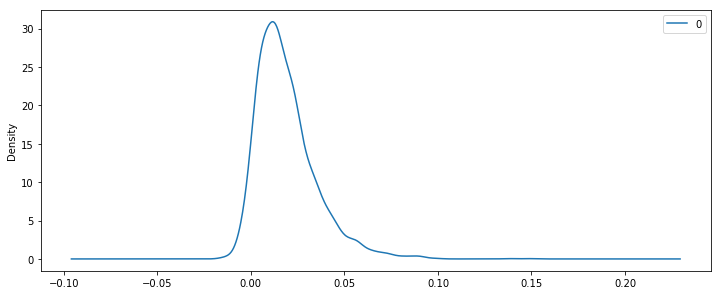

In [191]:
import pandas as pd
pd.DataFrame(data[1].T[1]).plot.kde()

In [85]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Estimating PDF
def EstPDF(data, bins=np.array([-1,0, 1]), mode='kernel', kernel='epanechnikov', kernel_bw=0.01, verbose=False):
    # kernels = 'epanechnikov','gaussian', 'tophat','exponential', 'linear', 'cosine'
    if mode == 'hist':
        if verbose:
            print 'EstPDF: Histogram Mode'
        [y,pts] = np.histogram(data,bins=100,density=True)
        bins_centers = pts[0:-1]+np.diff(pts)
        pdf = y*np.diff(pts)
        return [pdf,bins_centers]
    if mode == 'kernel':
        if verbose:
            print 'EstPDF: Kernel Mode'
        if kernel is None:
            if verbose:
                print 'No kernel defined'
            return -1
        if kernel_bw is None:
            if verbose:
                print 'No kernel bandwidth defined'
            return -1
        kde = (KernelDensity(kernel=kernel,algorithm='auto',bandwidth=kernel_bw).fit(data))
        aux_bins = bins
        log_dens_x = (kde.score_samples(aux_bins[:, np.newaxis]))
        pdf = np.exp(log_dens_x)
        pdf = pdf/sum(pdf)
        bins_centers = bins
        return [pdf,bins_centers]

# Computing KL Divergence
def KLDiv(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    [p_pdf,p_bins] = EstPDF(p, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    [q_pdf,q_bins] = EstPDF(q, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

# Computing KL Divergence
def KLDiv_conj(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    p_pdf_conj=1
    q_pdf_conj=1
    for i_anel in range(100): 
        [ppdf,p_bins] = EstPDF(p[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
        [qpdf,q_bins] = EstPDF(q[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    
        p_pdf_conj = p_pdf_conj*ppdf
        q_pdf_conj = q_pdf_conj*qpdf
    
    p_pdf=p_pdf_conj
    q_pdf=q_pdf_conj
    
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

In [86]:
pdf,bins = KLDiv(data0.T,val_Data.T)
print pdf

0.0


In [31]:
print data77.shape
print data87.shape
print data40.shape
print data10.shape

(339519, 100)
(339519, 100)
(339521, 100)
(339519, 100)


In [29]:
pdf

0.6241268774152477

In [ ]:
pdf,bins = EstPDF(val_data.T[84], verbose=True)